In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# build resnet model
def resnet_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    x = tf.keras.layers.Conv2D(filters1, (1, 1), strides=strides, name=conv_name_base + '2a')(input_tensor)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = tf.keras.layers.BatchNormalization(name=bn_name_base + '2c')(x)
    shortcut = tf.keras.layers.Conv2D(filters3, (1, 1), strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = tf.keras.layers.BatchNormalization(name=bn_name_base + '1')(shortcut)
    x = tf.keras.layers.add([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    return x

def resnet50(input_shape=(224, 224, 3), classes=1000):
    img_input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(img_input)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = tf.keras.layers.BatchNormalization(name='bn_conv1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = resnet_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = resnet_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = resnet_block(x, 3, [64, 64, 256], stage=2, block='c')
    x = resnet_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = resnet_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = resnet_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = resnet_block(x, 3, [128, 128, 512], stage=3, block='d')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = resnet_block(x, 3, [256, 256, 1024], stage=4, block='f')
    x = resnet_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = resnet_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = resnet_block(x, 3, [512, 512, 2048], stage=5, block='c')
    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(x)

    model = tf.keras.models.Model(inputs=img_input, outputs=x, name='resnet50')
    return model


    



2025-03-08 09:46:31.478053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741427191.719445    1888 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741427191.795717    1888 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 09:46:32.422675: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# build resnet model
resnet50 = resnet50()
resnet50.summary()

I0000 00:00:1741405921.184374    2297 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 112, 112,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 112, 112,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 55, 55,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2a      │ (None, 55, 55,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2a       │ (None, 55, 55,    │        256 │ res2a_branch2a[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 55, 55,    │          0 │ bn2a_branch2a[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2b      │ (None, 55, 55,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2b       │ (None, 55, 55,    │        256 │ res2a_branch2b[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 55, 55,    │          0 │ bn2a_branch2b[0]… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2c      │ (None, 55, 55,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch1       │ (None, 55, 55,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2c       │ (None, 55, 55,    │      1,024 │ res2a_branch2c[0… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch1        │ (None, 55, 55,    │      1,024 │ res2a_branch1[0]… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ bn2a_branch2c[0]

 Total params: 40,242,024 (153.51 MB)

 Trainable params: 40,166,376 (153.22 MB)

 Non-trainable params: 75,648 (295.50 KB)

In [3]:

resnet50_pretrained = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# resnet50_pretrained = tf.keras.applications.ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150, 150, 3))
# resnet50_pretrained =  tf.keras.applications.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation='softmax'
# )

I0000 00:00:1741427473.366757    1888 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [4]:
tf.keras.utils.plot_model(resnet50_pretrained, show_shapes=True, show_layer_activations=True, show_trainable=True, to_file='resnet50_pretrained.png')

In [5]:
#  tune the resnet50 pretrained model for scene classification
# load the Scene Classification dataset
import os
file_path = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection"
train_dir = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection/seg_train/seg_train"
validation_dir = "/mnt/c/Users/ASUS/Downloads/scene_detection/scene_detection/seg_test/seg_test"

categories = ['buildings', 'forest', 'glacier', 'mountain', 'forest', 'buildings']
train_categories = os.listdir(train_dir)
validation_categories = os.listdir(validation_dir)

print(train_categories)
print(validation_categories)






['buildings', 'forest', 'glacier', 'mountain', 'sea']
['buildings', 'forest', 'glacier', 'mountain', 'sea']


In [6]:
# prepare data set to train the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)



In [8]:
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=16, class_mode='categorical')
# validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=16, class_mode='categorical')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=16, class_mode='categorical', shuffle=True)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=16, class_mode='categorical', shuffle=True)


Found 10644 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


In [9]:
train_generator.class_indices , validation_generator.class_indices

({'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4},
 {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4})

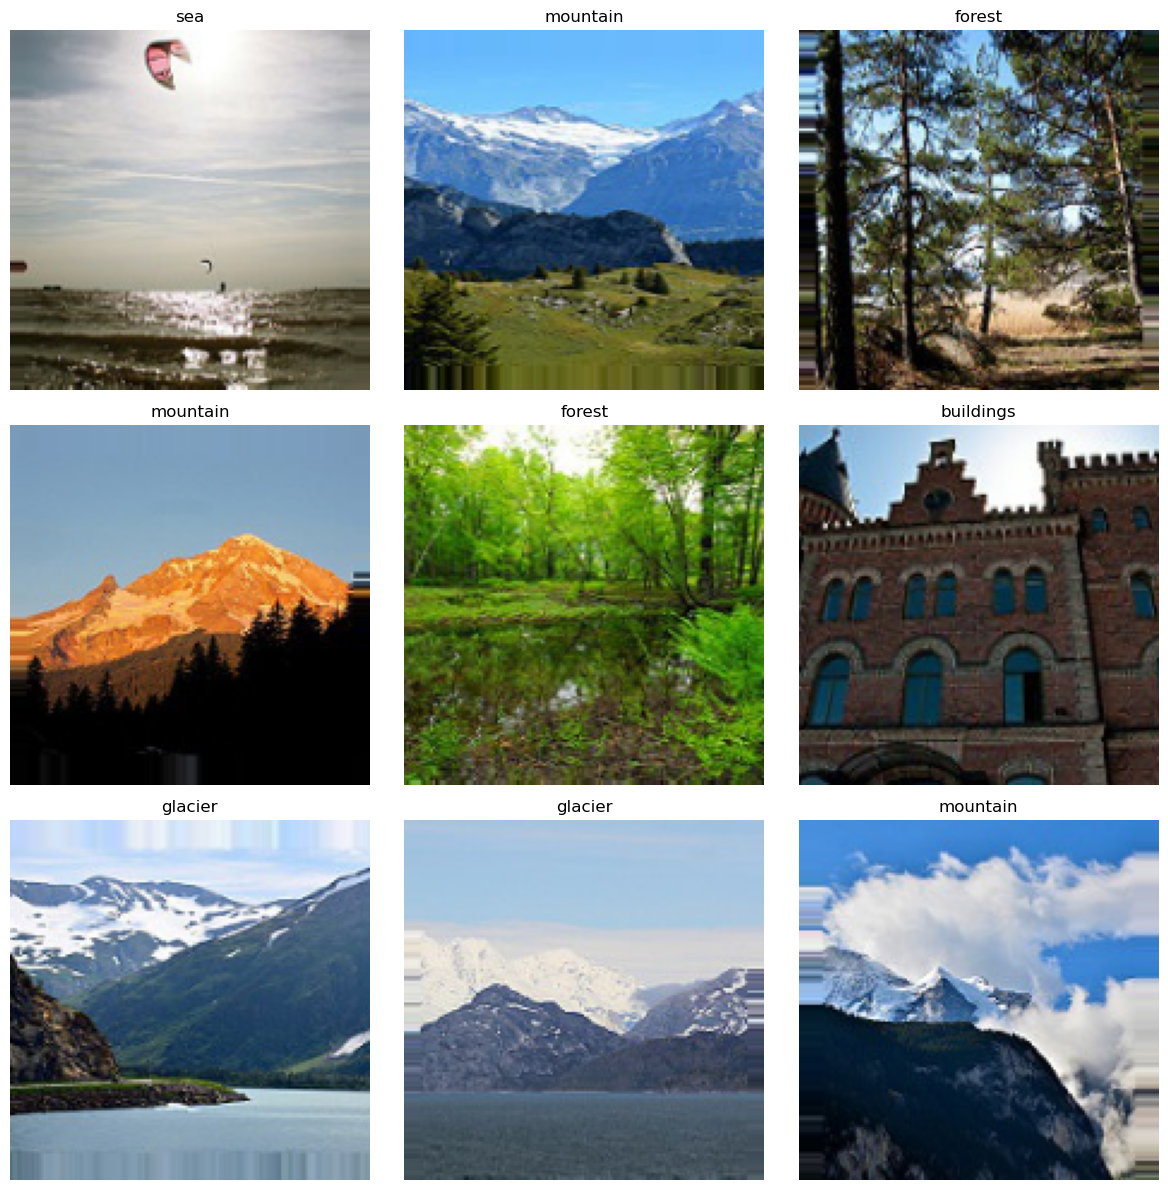

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea']


In [10]:
# Visualize classes and images
import matplotlib.pyplot as plt

# Get a batch of training data
x_batch, y_batch = next(train_generator)
class_names = list(train_generator.class_indices.keys())
# Plot the images in the batch, along with the corresponding labels
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for img, ax in zip(x_batch, axes):
    ax.imshow(img)
    ax.axis('off')
for i, ax in enumerate(axes):
    ax.set_title(class_names[np.argmax(y_batch[i])])
plt.tight_layout()
plt.show()
# Display class names
print("Class names:", class_names)

In [11]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

model_output = resnet50_pretrained.output
model_input = resnet50_pretrained.input
model_top = GlobalAveragePooling2D()(model_output)
model_top = Dropout(0.2)(model_top)
out = Dense(len(class_names), activation='softmax')(model_top)
Resnet50_model = tf.keras.models.Model(inputs=model_input, outputs=out)

In [12]:
from tensorflow.keras.optimizers import Adam

Resnet50_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('ResNet50_model.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')




In [14]:

history = Resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint]
)

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1741427794.601598    2568 service.cc:148] XLA service 0x7fc268003e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741427794.616048    2568 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-08 09:56:35.934861: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741427802.239961    2568 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1741427850.554362    2568 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


665/665 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.7904 - loss: 0.5589

2025-03-08 10:05:12.101913: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1514', 4 bytes spill stores, 4 bytes spill loads

2025-03-08 10:05:12.466959: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1514', 364 bytes spill stores, 364 bytes spill loads



665/665 ━━━━━━━━━━━━━━━━━━━━ 655s 831ms/step - accuracy: 0.7905 - loss: 0.5587 - val_accuracy: 0.9010 - val_loss: 0.2683
Epoch 2/5
  1/665 ━━━━━━━━━━━━━━━━━━━━ 3:27 312ms/step - accuracy: 1.0000 - loss: 0.1864

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


665/665 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 1.0000 - loss: 0.1864 - val_accuracy: 0.9018 - val_loss: 0.2665
Epoch 3/5
665/665 ━━━━━━━━━━━━━━━━━━━━ 286s 429ms/step - accuracy: 0.9121 - loss: 0.2563 - val_accuracy: 0.9010 - val_loss: 0.2989
Epoch 4/5
665/665 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.8750 - loss: 0.2263 - val_accuracy: 0.8986 - val_loss: 0.3008
Epoch 5/5
665/665 ━━━━━━━━━━━━━━━━━━━━ 430s 646ms/step - accuracy: 0.9274 - loss: 0.2152 - val_accuracy: 0.8994 - val_loss: 0.2985


1/1 - 0s - 369ms/step - accuracy: 0.8750 - loss: 0.1341


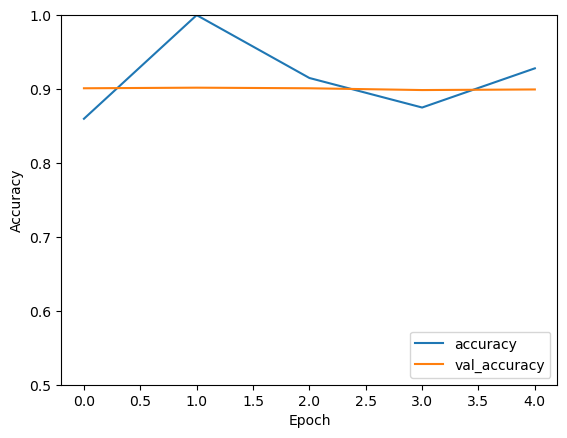

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Get a batch of validation data
test_images, test_labels = next(validation_generator)

test_loss, test_acc = Resnet50_model.evaluate(test_images, test_labels, verbose=2)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Get predictions
y_pred = Resnet50_model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Print the classification report
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 263ms/step
Accuracy: 0.20248099239695877
Precision: 0.2034318728064417
Recall: 0.20248099239695877

Classification Report:
               precision    recall  f1-score   support

   buildings       0.17      0.19      0.18       437
      forest       0.20      0.20      0.20       474
     glacier       0.23      0.22      0.23       553
    mountain       0.22      0.22      0.22       525
         sea       0.18      0.17      0.18       510

    accuracy                           0.20      2499
   macro avg       0.20      0.20      0.20      2499
weighted avg       0.20      0.20      0.20      2499



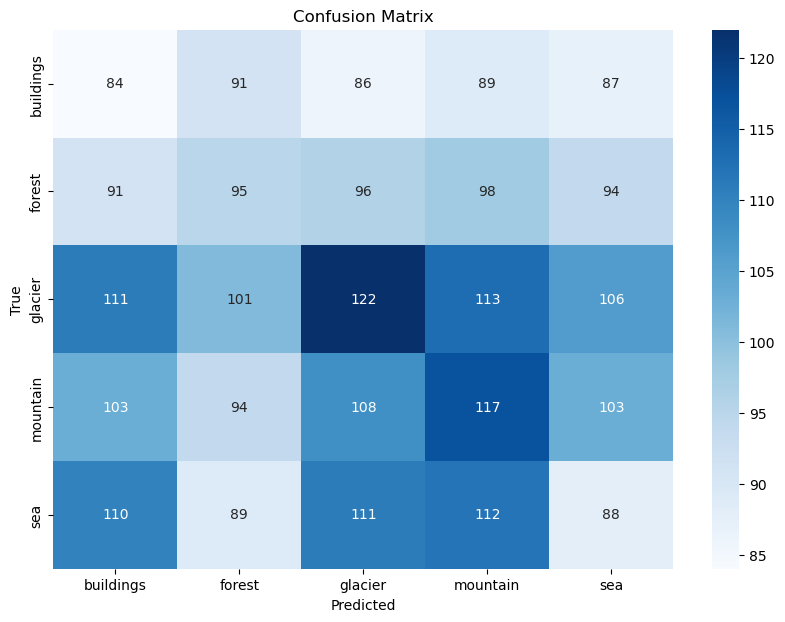

In [19]:
# Visualize results using a confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
print(test_acc)
print(test_loss)

0.875
0.13411881029605865
